In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('train.csv')
data.head(2)

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200       9/30/2008  Female      Service   
1      fffe3700360033003500      11/30/2008    Male      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   

   Burn Rate  
0       0.16  
1       0.36

## Data Understanding

In [4]:
data.describe()

Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

In [5]:
data.dropna(subset=['Burn Rate'],inplace=True)

In [6]:
data.isna().sum()/data.shape[0]

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     0.059096
Mental Fatigue Score    0.089938
Burn Rate               0.000000
dtype: float64

In [7]:
data.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation               int64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

#### Burn Rate

In [8]:
sns.histplot(data,x='Burn Rate',bins=100)

<AxesSubplot:xlabel='Burn Rate', ylabel='Count'>

In [9]:
data['Burn Rate']

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 21626, dtype: float64

### Empoyee ID

<AxesSubplot:xlabel='Employee ID', ylabel='Burn Rate'>

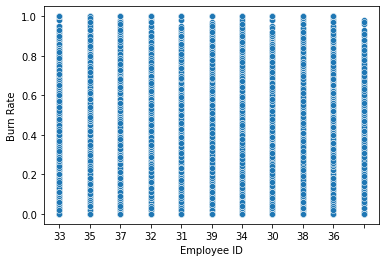

In [10]:
sns.scatterplot(data['Employee ID'].str.slice(16,18),data['Burn Rate'])
#no pattern hidden in employee ID

#### Gender

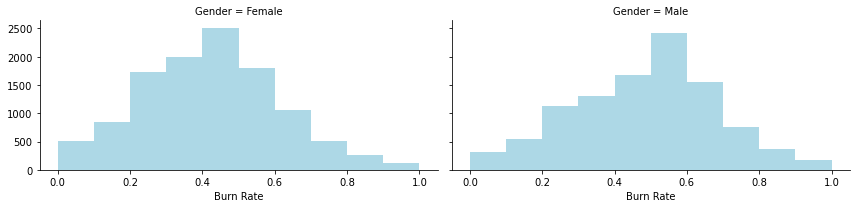

In [11]:
sns.FacetGrid(data,col='Gender',aspect=2).map(plt.hist,'Burn Rate',color='lightblue',bins=10)

#### Company Type

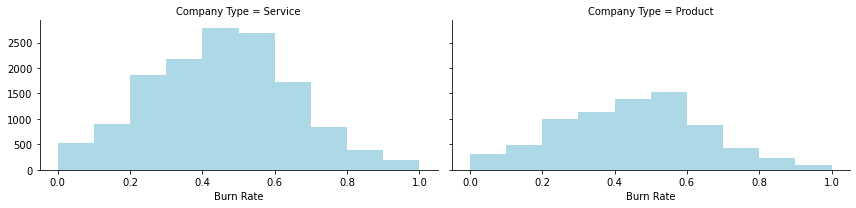

In [12]:
sns.FacetGrid(data,col='Company Type',aspect=2).map(plt.hist,'Burn Rate',color='lightblue',bins=10)

#### WFH Setup Available

In [13]:
sns.FacetGrid(data,col='WFH Setup Available',aspect=2).map(plt.hist,'Burn Rate',color='lightblue',bins=10)

#### Date of Joining

In [14]:
data['Date of Joining'].nunique()

366

In [15]:
data['Date of Joining']=pd.to_datetime(data['Date of Joining'],format='%m/%d/%Y')

In [16]:
Day=data['Date of Joining'].map(lambda x:x.day)
Month=data['Date of Joining'].map(lambda x:x.month)
Year=data['Date of Joining'].map(lambda x:x.year)

In [17]:
Year.unique()
# All the data belong to 2008, therefore this feature is not useful

array([2008], dtype=int64)

In [18]:
data.insert(1,'Day',Day)
data.insert(2,'Month',Month)
data.head(2)

Employee ID  Day  Month Date of Joining  Gender Company Type  \
0  fffe32003000360033003200   30      9      2008-09-30  Female      Service   
1      fffe3700360033003500   30     11      2008-11-30    Male      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   

   Burn Rate  
0       0.16  
1       0.36

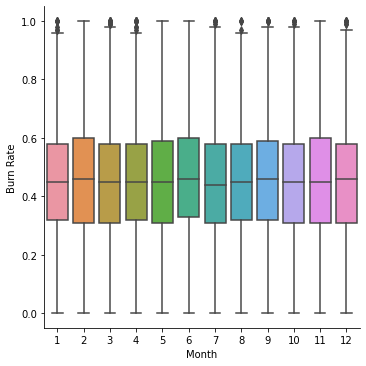

In [19]:
sns.catplot(data=data, x='Month', y='Burn Rate', kind='box')

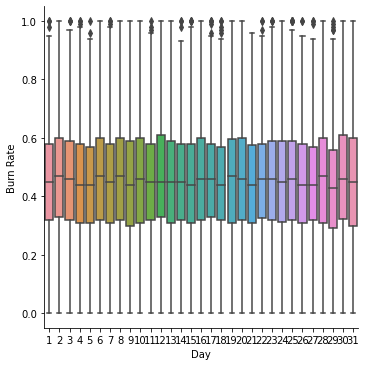

In [20]:
sns.catplot(data=data, x='Day', y='Burn Rate', kind='box')

#### Designation

In [21]:
data['Designation'].unique()

array([2, 1, 3, 0, 4, 5], dtype=int64)

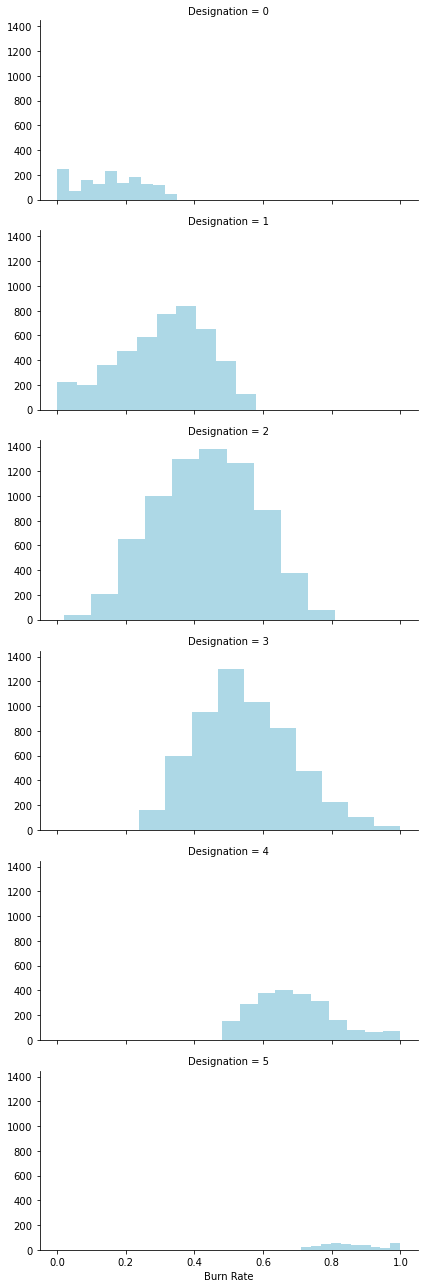

In [22]:
sns.FacetGrid(data,row='Designation',aspect=2).map(plt.hist,'Burn Rate',color='lightblue',bins=10)
# Should consider as categorical,(will try as continous first though)

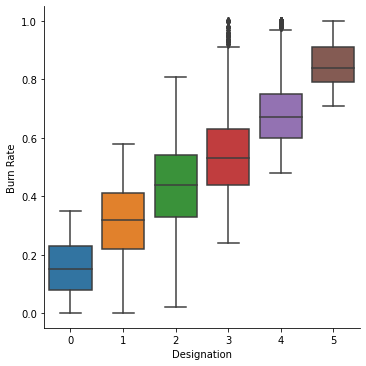

In [23]:
sns.catplot(data=data, x='Designation', y='Burn Rate', kind='box')
#looks like we found another jackpot, should use as categorical for sure

In [24]:
data['Designation']=data['Designation'].astype(str)

#### Resource Allocation

In [25]:
data['Resource Allocation'].nunique()
# for nan 0 seems suitable number

10

<AxesSubplot:xlabel='Resource Allocation', ylabel='Count'>

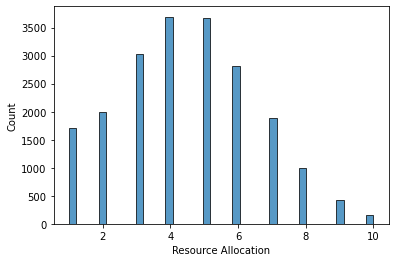

In [26]:
sns.histplot(x=data['Resource Allocation'])

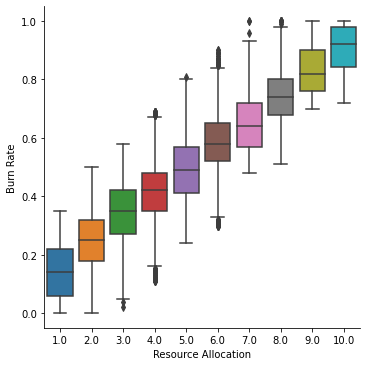

In [27]:
sns.catplot(data=data, x='Resource Allocation', y='Burn Rate', kind='box')
#should consider using as categorical Feature

In [28]:
# data['Resource Allocation'].fillna(5.0,inplace=True)
# data['Resource Allocation']=data['Resource Allocation'].astype(str)

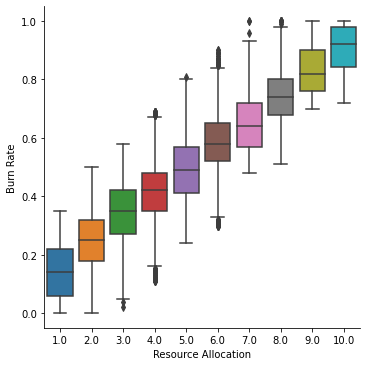

In [29]:
sns.catplot(data=data, x='Resource Allocation', y='Burn Rate', kind='box')

#### Mental Fatigue Score

In [30]:
data['Mental Fatigue Score'].nunique()

101

<AxesSubplot:xlabel='Mental Fatigue Score', ylabel='Burn Rate'>

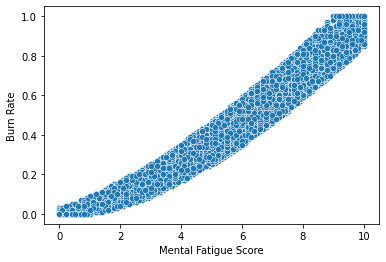

In [31]:
sns.scatterplot(x=data['Mental Fatigue Score'],y=data['Burn Rate'])
# seems like we found the jackpot

## Data Preparation

In [32]:
data.dtypes

Employee ID                     object
Day                              int64
Month                            int64
Date of Joining         datetime64[ns]
Gender                          object
Company Type                    object
WFH Setup Available             object
Designation                     object
Resource Allocation            float64
Mental Fatigue Score           float64
Burn Rate                      float64
dtype: object

In [33]:
train=data.drop(['Employee ID','Date of Joining'],axis=1)
#train['Resource Allocation']=train['Resource Allocation'].astype(str)

In [34]:
train.head()

Day  Month  Gender Company Type WFH Setup Available Designation  \
0   30      9  Female      Service                  No           2   
1   30     11    Male      Service                 Yes           1   
2   10      3  Female      Product                 Yes           2   
3    3     11    Male      Service                 Yes           1   
4   24      7  Female      Service                  No           3   

   Resource Allocation  Mental Fatigue Score  Burn Rate  
0                  3.0                   3.8       0.16  
1                  2.0                   5.0       0.36  
2                  NaN                   5.8       0.49  
3                  1.0                   2.6       0.20  
4                  7.0                   6.9       0.52

In [35]:
train=pd.get_dummies(train,drop_first=True)

In [36]:
cols=train.columns
cols

Index(['Day', 'Month', 'Resource Allocation', 'Mental Fatigue Score',
       'Burn Rate', 'Gender_Male', 'Company Type_Service',
       'WFH Setup Available_Yes', 'Designation_1', 'Designation_2',
       'Designation_3', 'Designation_4', 'Designation_5'],
      dtype='object')

##### Iterative imputation

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [38]:
imp=IterativeImputer(estimator=ExtraTreesRegressor(),max_iter=30,random_state=200)

In [ ]:
temp=imp.fit_transform(train)

In [40]:
train=pd.DataFrame(temp[:,[train.columns.get_loc(i) for i in cols]], columns=cols)

In [ ]:
train['Resource Allocation']=np.round(train['Resource Allocation'])

In [41]:
train.isna().sum()

Day                         0
Month                       0
Mental Fatigue Score        0
Burn Rate                   0
Gender_Male                 0
Company Type_Service        0
WFH Setup Available_Yes     0
Designation_1               0
Designation_2               0
Designation_3               0
Designation_4               0
Designation_5               0
Resource Allocation_10.0    0
Resource Allocation_2.0     0
Resource Allocation_3.0     0
Resource Allocation_4.0     0
Resource Allocation_5.0     0
Resource Allocation_6.0     0
Resource Allocation_7.0     0
Resource Allocation_8.0     0
Resource Allocation_9.0     0
Resource Allocation_nan     0
dtype: int64

In [ ]:
train['Resource Allocation'].unique()

In [ ]:
sns.scatterplot(x=train['Mental Fatigue Score'],y=train['Burn Rate'])
# seems like we found the jackpot

In [ ]:
sns.catplot(data=data, x='Resource Allocation', y='Burn Rate', kind='box')

In [ ]:
train.to_csv('TrainFilter.csv',index=False)

#### Resource Allocation Imputation

In [ ]:
# train=train.drop(['Resource Allocation'],axis=1)

In [ ]:
# train.insert(1,'Resource Allocation',data['Resource Allocation'])

In [ ]:
# train['Resource Allocation'].nunique()

In [ ]:
# cols=train.columns

In [ ]:
# from sklearn.impute import KNNImputer
# imp=KNNImputer(n_neighbors=10)
# temp=imp.fit_transform(train)

In [ ]:
# train=pd.DataFrame(temp[:,[train.columns.get_loc(i) for i in cols]], columns=cols)

In [ ]:
# train['Resource Allocation']=np.round(train['Resource Allocation'])
# train

In [ ]:
# train['Resource Allocation'].unique()

In [ ]:
# sns.catplot(data=train, x='Resource Allocation', y='Burn Rate', kind='box')
# #should consider using as categorical Feature

In [ ]:
# train['Resource Allocation']=train['Resource Allocation'].astype(str)

In [88]:




from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train= pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
train.head()

Month  Mental Fatigue Score  Burn Rate  Gender_Male  \
0  0.727273                  0.38       0.16          0.0   
1  0.909091                  0.50       0.36          1.0   
2  0.181818                  0.58       0.49          0.0   
3  0.909091                  0.26       0.20          1.0   
4  0.545455                  0.69       0.52          0.0   

   Company Type_Service  WFH Setup Available_Yes  Designation_1  \
0                   1.0                      0.0            0.0   
1                   1.0                      1.0            1.0   
2                   0.0                      1.0            0.0   
3                   1.0                      1.0            1.0   
4                   1.0                      0.0            0.0   

   Designation_2  Designation_3  Designation_4  Designation_5  \
0            1.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0   
2            1.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0   
4            0.0            1.0            0.0            0.0   

   Resource Allocation_10.0  Resource Allocation_2.0  Resource Allocation_3.0  \
0                       0.0                      0.0                      1.0   
1                       0.0                      1.0                      0.0   
2                       0.0                      0.0                      0.0   
3                       0.0                      0.0                      0.0   
4                       0.0                      0.0                      0.0   

   Resource Allocation_4.0  Resource Allocation_5.0  Resource Allocation_6.0  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      1.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   Resource Allocation_7.0  Resource Allocation_8.0  Resource Allocation_9.0  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                      0.0                      0.0                      0.0  
3                      0.0                      0.0                      0.0  
4                      1.0                      0.0                      0.0

## Feature Reduction and Selection

In [48]:
corrMat=train.corr()
corrFeat=corrMat.index
plt.figure(figsize=(20,20))
sns.heatmap(corrMat,annot=True,cmap='RdYlGn',linewidths=1.2)

<AxesSubplot:>

In [80]:
#High correlation with Burn Rate is great news we should keep Designation and Mental Fatigue rate as they are strong Predictor

### Model Building

In [49]:
Y=train['Burn Rate']
X=train.drop(['Burn Rate','Month'],axis=1)

In [50]:
X.shape

(18590, 18)

In [51]:
X.head()

Mental Fatigue Score  Gender_Male  Company Type_Service  \
0                   3.8            0                     1   
1                   5.0            1                     1   
3                   2.6            1                     1   
4                   6.9            0                     1   
5                   3.6            1                     0   

   WFH Setup Available_Yes  Designation_1  Designation_2  Designation_3  \
0                        0              0              1              0   
1                        1              1              0              0   
3                        1              1              0              0   
4                        0              0              0              1   
5                        1              0              1              0   

   Designation_4  Designation_5  Resource Allocation_10.0  \
0              0              0                         0   
1              0              0                         0   
3              0              0                         0   
4              0              0                         0   
5              0              0                         0   

   Resource Allocation_2.0  Resource Allocation_3.0  Resource Allocation_4.0  \
0                        0                        1                        0   
1                        1                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   
5                        0                        0                        1   

   Resource Allocation_5.0  Resource Allocation_6.0  Resource Allocation_7.0  \
0                        0                        0                        0   
1                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        1   
5                        0                        0                        0   

   Resource Allocation_8.0  Resource Allocation_9.0  
0                        0                        0  
1                        0                        0  
3                        0                        0  
4                        0                        0  
5                        0                        0

In [52]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=200)

In [53]:
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [55]:
for i in range(100,300,30):
    bagMod=BaggingRegressor(oob_score=True,n_jobs=-1,n_estimators=i,max_samples=1.0,
                      random_state=200,base_estimator=DecisionTreeRegressor())
    bagMod.fit(X,Y)
    print(f"for {i} estimators accuracy is {bagMod.oob_score_}")

for 100 estimators accuracy is 0.91550975631819
for 130 estimators accuracy is 0.9157036297567595
for 160 estimators accuracy is 0.9157831028918196
for 190 estimators accuracy is 0.915820029261161
for 220 estimators accuracy is 0.915880586860724
for 250 estimators accuracy is 0.9159050317532834
for 280 estimators accuracy is 0.9158961487826501


In [56]:
bagMod.score(X_test,Y_test)

0.946817156958482

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lm1=LinearRegression(n_jobs=-1)
lm1.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [59]:
lm1.score(X_test,Y_test)

0.9206169148862051

### XGBRegressor

In [60]:
params={
 "learning_rate"    : [0.05] ,
 "max_depth"        : [ 3, 4, 5, 6, 8,],
 "min_child_weight" : [ 1, 3, 5, 7,9 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3,0.4]
}

In [61]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
xgBoost=XGBRegressor(n_estimator=600,n_jobs=-1)
random_search=RandomizedSearchCV(xgBoost,param_distributions=params,n_iter=8,n_jobs=-1,cv=6,verbose=3)
random_search.fit(X,Y)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   24.7s finished


[19:42:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=6,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimator=600, n_estimators=100,
                                          n_jobs=-1, num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                        

In [62]:
random_search.score(X_test,Y_test)

0.9276469438519293

In [63]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimator=600, n_estimators=100, n_jobs=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

# Test Data Preparation

In [63]:
test=pd.read_csv('test.csv')
test.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe31003300390039003000      2008-12-10  Female      Service   
1  fffe31003300310037003800      2008-08-14  Female      Product   
2  fffe33003400380035003900      2008-11-13    Male      Product   
3      fffe3100370039003200      2008-02-07  Female      Service   
4  fffe32003600390036003700      2008-07-17  Female      Product   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  
0                  No          2.0                  5.0                   7.7  
1                 Yes          1.0                  2.0                   5.2  
2                 Yes          1.0                  3.0                   5.9  
3                  No          3.0                  6.0                   4.6  
4                  No          2.0                  5.0                   6.4

In [64]:
test.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
dtype: object

In [65]:
test.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [66]:
test.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe31003300390039003000      2008-12-10  Female      Service   
1  fffe31003300310037003800      2008-08-14  Female      Product   
2  fffe33003400380035003900      2008-11-13    Male      Product   
3      fffe3100370039003200      2008-02-07  Female      Service   
4  fffe32003600390036003700      2008-07-17  Female      Product   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  
0                  No          2.0                  5.0                   7.7  
1                 Yes          1.0                  2.0                   5.2  
2                 Yes          1.0                  3.0                   5.9  
3                  No          3.0                  6.0                   4.6  
4                  No          2.0                  5.0                   6.4

In [67]:
test['Date of Joining']=pd.to_datetime(test['Date of Joining'],format='%Y/%m/%d')
test.head(2)

Employee ID Date of Joining  Gender Company Type  \
0  fffe31003300390039003000      2008-12-10  Female      Service   
1  fffe31003300310037003800      2008-08-14  Female      Product   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  
0                  No          2.0                  5.0                   7.7  
1                 Yes          1.0                  2.0                   5.2

In [76]:
Month=test['Date of Joining'].map(lambda x:x.month)
test.insert(1,'Month',Month)

ValueError: cannot insert Month, already exists

In [69]:
Day=test['Date of Joining'].map(lambda x:x.day)
test.insert(1,'Day',Day)

In [70]:
test['Resource Allocation'].nunique()

10

In [71]:
test['Resource Allocation']=test['Resource Allocation'].astype(str)
test['Designation']=test['Designation'].astype(int).astype(str)

In [72]:
test.to_csv('TestID.csv',index=False)

In [77]:
X=test.drop(['Employee ID','Date of Joining'],axis=1)

In [78]:
X


Day  Month  Gender Company Type WFH Setup Available Designation  \
0       10     12  Female      Service                  No           2   
1       14      8  Female      Product                 Yes           1   
2       13     11    Male      Product                 Yes           1   
3        7      2  Female      Service                  No           3   
4       17      7  Female      Product                  No           2   
...    ...    ...     ...          ...                 ...         ...   
12245    2     10  Female      Service                 Yes           1   
12246   31      3  Female      Product                 Yes           2   
12247   12      2    Male      Service                  No           4   
12248    6      2    Male      Service                  No           3   
12249    5      8  Female      Product                  No           2   

      Resource Allocation  Mental Fatigue Score  
0                     5.0                   7.7  
1                     2.0                   5.2  
2                     3.0                   5.9  
3                     6.0                   4.6  
4                     5.0                   6.4  
...                   ...                   ...  
12245                 2.0                   6.1  
12246                 4.0                   5.9  
12247                 7.0                   9.6  
12248                 6.0                   6.7  
12249                 2.0                   2.0  

[12250 rows x 8 columns]

In [108]:
X=pd.get_dummies(X,drop_first=True)

In [109]:
X.shape

(12250, 18)

In [110]:
X.head(2)

Mental Fatigue Score  Gender_Male  Company Type_Service  \
0                   7.7            0                     1   
1                   5.2            0                     0   

   WFH Setup Available_Yes  Designation_1  Designation_2  Designation_3  \
0                        0              0              1              0   
1                        1              1              0              0   

   Designation_4  Designation_5  Resource Allocation_10.0  \
0              0              0                         0   
1              0              0                         0   

   Resource Allocation_2.0  Resource Allocation_3.0  Resource Allocation_4.0  \
0                        0                        0                        0   
1                        1                        0                        0   

   Resource Allocation_5.0  Resource Allocation_6.0  Resource Allocation_7.0  \
0                        1                        0                        0   
1                        0                        0                        0   

   Resource Allocation_8.0  Resource Allocation_9.0  
0                        0                        0  
1                        0                        0

In [111]:
X.to_csv('TestFilter.csv',index=False)

In [78]:
# train= pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
X.head()

Mental Fatigue Score  Gender_Male  Company Type_Service  \
0                   7.7            0                     1   
1                   5.2            0                     0   
2                   5.9            1                     0   
3                   4.6            0                     1   
4                   6.4            0                     0   

   WFH Setup Available_Yes  Designation_1  Designation_2  Designation_3  \
0                        0              0              1              0   
1                        1              1              0              0   
2                        1              1              0              0   
3                        0              0              0              1   
4                        0              0              1              0   

   Designation_4  Designation_5  Resource Allocation_10.0  \
0              0              0                         0   
1              0              0                         0   
2              0              0                         0   
3              0              0                         0   
4              0              0                         0   

   Resource Allocation_2.0  Resource Allocation_3.0  Resource Allocation_4.0  \
0                        0                        0                        0   
1                        1                        0                        0   
2                        0                        1                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Resource Allocation_5.0  Resource Allocation_6.0  Resource Allocation_7.0  \
0                        1                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        1                        0   
4                        1                        0                        0   

   Resource Allocation_8.0  Resource Allocation_9.0  
0                        0                        0  
1                        0                        0  
2                        0                        0  
3                        0                        0  
4                        0                        0

In [79]:
preds=random_search.predict(X)

In [83]:
preds

array([0.61292934, 0.35494977, 0.4270809 , ..., 0.83131444, 0.57507974,
       0.1229651 ], dtype=float32)

In [84]:
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [85]:
result.to_csv('Result.csv',index=False)

In [78]:
bagMod.score(X_test,Y_test)

0.9797234227333406

In [79]:
preds=bagMod.predict(X)

In [80]:
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [81]:
result.to_csv('bag.csv',index=False)

# Experimental

## CatBoost

In [50]:
from catboost import CatBoostRegressor
clf = CatBoostRegressor(iterations=1000, learning_rate=0.1,random_seed=200)

In [51]:
exp=data.drop(['Employee ID','Date of Joining'],axis=1)

In [52]:
# exp['Mental Fatigue Score']=train['Mental Fatigue Score'].to_numpy()

In [53]:
# exp['Mental Fatigue Score'].shape

In [54]:
# data=data.dropna(subset=['Burn Rate'])
exp.isna().sum()

Day                     0
Month                   0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [55]:
trainX=exp.drop(['Burn Rate'],axis=1)
trainY=exp['Burn Rate']

In [56]:
trainX.dtypes

Day                       int64
Month                     int64
Gender                   object
Company Type             object
WFH Setup Available      object
Designation              object
Resource Allocation      object
Mental Fatigue Score    float64
dtype: object

In [57]:
cat_features=[0,1,2,3,4,5,6]

In [58]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(trainX, trainY, test_size=0.2, random_state=0)

In [59]:
clf.fit(X_train, Y_train, cat_features=cat_features,verbose=True)

0:	learn: 0.1822928	total: 166ms	remaining: 2m 45s
1:	learn: 0.1672335	total: 189ms	remaining: 1m 34s
2:	learn: 0.1536776	total: 212ms	remaining: 1m 10s
3:	learn: 0.1414956	total: 233ms	remaining: 57.9s
4:	learn: 0.1308543	total: 249ms	remaining: 49.6s
5:	learn: 0.1213486	total: 278ms	remaining: 46.1s
6:	learn: 0.1124723	total: 292ms	remaining: 41.5s
7:	learn: 0.1049079	total: 309ms	remaining: 38.3s
8:	learn: 0.0982562	total: 328ms	remaining: 36.1s
9:	learn: 0.0922915	total: 342ms	remaining: 33.9s
10:	learn: 0.0869081	total: 356ms	remaining: 32s
11:	learn: 0.0822642	total: 377ms	remaining: 31s
12:	learn: 0.0783095	total: 401ms	remaining: 30.5s
13:	learn: 0.0747544	total: 420ms	remaining: 29.5s
14:	learn: 0.0717656	total: 432ms	remaining: 28.3s
15:	learn: 0.0691082	total: 457ms	remaining: 28.1s
16:	learn: 0.0668902	total: 528ms	remaining: 30.5s
17:	learn: 0.0651972	total: 538ms	remaining: 29.4s
18:	learn: 0.0634939	total: 564ms	remaining: 29.1s
19:	learn: 0.0621423	total: 592ms	remainin

167:	learn: 0.0521634	total: 3.15s	remaining: 15.6s
168:	learn: 0.0521519	total: 3.16s	remaining: 15.6s
169:	learn: 0.0521430	total: 3.19s	remaining: 15.6s
170:	learn: 0.0521346	total: 3.2s	remaining: 15.5s
171:	learn: 0.0521315	total: 3.21s	remaining: 15.4s
172:	learn: 0.0521187	total: 3.22s	remaining: 15.4s
173:	learn: 0.0521119	total: 3.25s	remaining: 15.4s
174:	learn: 0.0521060	total: 3.26s	remaining: 15.4s
175:	learn: 0.0520869	total: 3.28s	remaining: 15.3s
176:	learn: 0.0520719	total: 3.29s	remaining: 15.3s
177:	learn: 0.0520669	total: 3.29s	remaining: 15.2s
178:	learn: 0.0520639	total: 3.31s	remaining: 15.2s
179:	learn: 0.0520598	total: 3.31s	remaining: 15.1s
180:	learn: 0.0520570	total: 3.32s	remaining: 15s
181:	learn: 0.0520511	total: 3.33s	remaining: 15s
182:	learn: 0.0520408	total: 3.36s	remaining: 15s
183:	learn: 0.0520356	total: 3.37s	remaining: 14.9s
184:	learn: 0.0520261	total: 3.4s	remaining: 15s
185:	learn: 0.0520166	total: 3.41s	remaining: 14.9s
186:	learn: 0.0520107	

334:	learn: 0.0508663	total: 5.71s	remaining: 11.3s
335:	learn: 0.0508562	total: 5.71s	remaining: 11.3s
336:	learn: 0.0508471	total: 5.72s	remaining: 11.3s
337:	learn: 0.0508423	total: 5.73s	remaining: 11.2s
338:	learn: 0.0508336	total: 5.8s	remaining: 11.3s
339:	learn: 0.0508273	total: 5.83s	remaining: 11.3s
340:	learn: 0.0508158	total: 5.86s	remaining: 11.3s
341:	learn: 0.0508125	total: 5.88s	remaining: 11.3s
342:	learn: 0.0508096	total: 5.89s	remaining: 11.3s
343:	learn: 0.0508054	total: 5.92s	remaining: 11.3s
344:	learn: 0.0507950	total: 5.93s	remaining: 11.3s
345:	learn: 0.0507846	total: 5.94s	remaining: 11.2s
346:	learn: 0.0507778	total: 5.96s	remaining: 11.2s
347:	learn: 0.0507641	total: 5.97s	remaining: 11.2s
348:	learn: 0.0507585	total: 6s	remaining: 11.2s
349:	learn: 0.0507549	total: 6.01s	remaining: 11.2s
350:	learn: 0.0507518	total: 6.03s	remaining: 11.2s
351:	learn: 0.0507443	total: 6.04s	remaining: 11.1s
352:	learn: 0.0507368	total: 6.05s	remaining: 11.1s
353:	learn: 0.05

501:	learn: 0.0498012	total: 8.5s	remaining: 8.44s
502:	learn: 0.0497954	total: 8.52s	remaining: 8.41s
503:	learn: 0.0497889	total: 8.55s	remaining: 8.41s
504:	learn: 0.0497857	total: 8.57s	remaining: 8.4s
505:	learn: 0.0497812	total: 8.63s	remaining: 8.42s
506:	learn: 0.0497750	total: 8.68s	remaining: 8.44s
507:	learn: 0.0497671	total: 8.69s	remaining: 8.42s
508:	learn: 0.0497582	total: 8.7s	remaining: 8.39s
509:	learn: 0.0497515	total: 8.72s	remaining: 8.38s
510:	learn: 0.0497458	total: 8.73s	remaining: 8.36s
511:	learn: 0.0497364	total: 8.77s	remaining: 8.36s
512:	learn: 0.0497282	total: 8.77s	remaining: 8.33s
513:	learn: 0.0497164	total: 8.79s	remaining: 8.31s
514:	learn: 0.0497142	total: 8.8s	remaining: 8.29s
515:	learn: 0.0497094	total: 8.82s	remaining: 8.28s
516:	learn: 0.0497002	total: 8.87s	remaining: 8.29s
517:	learn: 0.0496942	total: 8.88s	remaining: 8.26s
518:	learn: 0.0496918	total: 8.89s	remaining: 8.24s
519:	learn: 0.0496848	total: 8.89s	remaining: 8.21s
520:	learn: 0.04

663:	learn: 0.0488785	total: 11.3s	remaining: 5.74s
664:	learn: 0.0488676	total: 11.4s	remaining: 5.73s
665:	learn: 0.0488636	total: 11.4s	remaining: 5.73s
666:	learn: 0.0488570	total: 11.4s	remaining: 5.71s
667:	learn: 0.0488474	total: 11.4s	remaining: 5.69s
668:	learn: 0.0488408	total: 11.5s	remaining: 5.67s
669:	learn: 0.0488307	total: 11.5s	remaining: 5.66s
670:	learn: 0.0488245	total: 11.5s	remaining: 5.63s
671:	learn: 0.0488082	total: 11.5s	remaining: 5.61s
672:	learn: 0.0488053	total: 11.5s	remaining: 5.59s
673:	learn: 0.0488004	total: 11.5s	remaining: 5.57s
674:	learn: 0.0487879	total: 11.5s	remaining: 5.55s
675:	learn: 0.0487779	total: 11.5s	remaining: 5.53s
676:	learn: 0.0487732	total: 11.6s	remaining: 5.51s
677:	learn: 0.0487683	total: 11.6s	remaining: 5.52s
678:	learn: 0.0487667	total: 11.6s	remaining: 5.5s
679:	learn: 0.0487592	total: 11.6s	remaining: 5.48s
680:	learn: 0.0487551	total: 11.7s	remaining: 5.46s
681:	learn: 0.0487443	total: 11.7s	remaining: 5.45s
682:	learn: 0

825:	learn: 0.0479914	total: 14.7s	remaining: 3.1s
826:	learn: 0.0479888	total: 14.7s	remaining: 3.08s
827:	learn: 0.0479830	total: 14.8s	remaining: 3.07s
828:	learn: 0.0479810	total: 14.8s	remaining: 3.06s
829:	learn: 0.0479754	total: 14.8s	remaining: 3.04s
830:	learn: 0.0479680	total: 14.9s	remaining: 3.02s
831:	learn: 0.0479612	total: 14.9s	remaining: 3.01s
832:	learn: 0.0479520	total: 14.9s	remaining: 3s
833:	learn: 0.0479453	total: 15s	remaining: 2.98s
834:	learn: 0.0479390	total: 15s	remaining: 2.96s
835:	learn: 0.0479352	total: 15s	remaining: 2.94s
836:	learn: 0.0479349	total: 15s	remaining: 2.92s
837:	learn: 0.0479307	total: 15s	remaining: 2.91s
838:	learn: 0.0479221	total: 15.1s	remaining: 2.89s
839:	learn: 0.0479181	total: 15.1s	remaining: 2.87s
840:	learn: 0.0479122	total: 15.1s	remaining: 2.85s
841:	learn: 0.0479087	total: 15.1s	remaining: 2.83s
842:	learn: 0.0479052	total: 15.1s	remaining: 2.82s
843:	learn: 0.0478989	total: 15.2s	remaining: 2.8s
844:	learn: 0.0478878	total

990:	learn: 0.0471378	total: 17.7s	remaining: 161ms
991:	learn: 0.0471335	total: 17.8s	remaining: 143ms
992:	learn: 0.0471252	total: 17.8s	remaining: 125ms
993:	learn: 0.0471205	total: 17.8s	remaining: 107ms
994:	learn: 0.0471190	total: 17.8s	remaining: 89.4ms
995:	learn: 0.0471152	total: 17.8s	remaining: 71.5ms
996:	learn: 0.0471128	total: 17.8s	remaining: 53.6ms
997:	learn: 0.0471094	total: 17.9s	remaining: 35.8ms
998:	learn: 0.0471040	total: 17.9s	remaining: 17.9ms
999:	learn: 0.0470978	total: 17.9s	remaining: 0us


In [60]:
print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 1000, 'learning_rate': 0.1, 'loss_function': 'RMSE', 'random_seed': 200}


In [61]:
clf.score(X_test, Y_test)

0.9262462911244916

In [79]:
preds=clf.predict(X)

In [80]:
result=pd.DataFrame(data={'Employee ID':test['Employee ID'],'Burn Rate':preds})

In [81]:
result.to_csv('Result.csv',index=False)